## Correlation and variance threshold

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Variance Threshold

In [18]:
from sklearn.feature_selection import VarianceThreshold #Understand from sklearn documentation
df["MyNewCol"] = 100

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MyNewCol
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,100
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,100
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,100
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,100
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,100


In [21]:
VarThresh = VarianceThreshold(threshold=1)
VarThresh.fit(df)
VarThresh.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True, False])

In [22]:
df.columns[VarThresh.get_support()]

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')

## 2- Corelation

In [23]:
corr_df=df.corr()
corr_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MyNewCol
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,NaN
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,NaN
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,NaN
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,NaN
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,NaN
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,NaN
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,NaN
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,NaN
MyNewCol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
## Nitish logic
def corr_chck(dataset, threshold):
    ls=[]
    corr_df=dataset.corr()
    for i,cl in enumerate(corr_df):
        for j in range(i):
            if abs(corr_df.iloc[i,j])>threshold:
                ls.append(cl)
    return ls


In [26]:
corr_chck(df, .8)

['AveBedrms', 'Longitude']

In [27]:

## Krish logic
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


corr_chck(df, .8)


['AveBedrms', 'Longitude']

'C:\\Users\\admin\\Downloads\\Documents'

<Axes: >

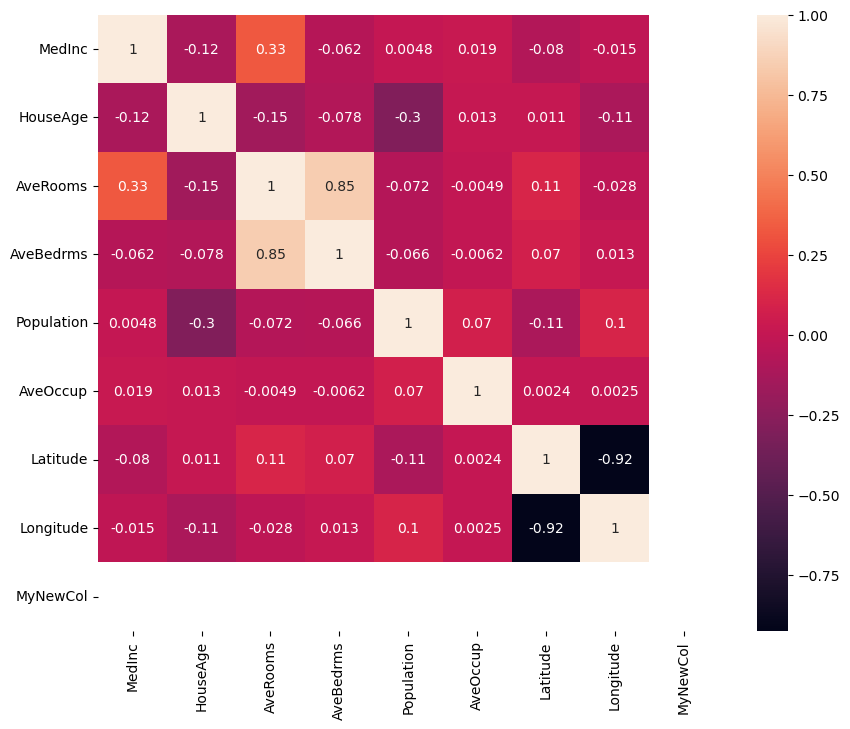

In [28]:

CorrMat = df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(CorrMat,annot=True)

In [32]:
import os
pt=os.getcwd()+"\\Python_practise\\Feature Selection\\train.csv"
pt

'C:\\Users\\admin\\Downloads\\Documents\\Python_practise\\Feature Selection\\train.csv'

In [39]:
from sklearn.model_selection import train_test_split
df=pd.read_csv(pt,nrows=2500)
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [45]:
df.shape

(2500, 371)

In [49]:
corr_feat = corr_chck(X_train, .9)
len(set(corr_features))

153

In [48]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

153

## 3- Fisher Score- Chisquare Test For Feature Selection

In [57]:
import seaborn as sns
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [58]:
df1= df.select_dtypes(exclude=["int64","float64"])
df1.head()

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True


In [59]:
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [60]:
import warnings
warnings.filterwarnings("ignore")

## Applying Encodings

In [61]:
df["sex"]=df["sex"].apply(lambda x:1 if x=="male" else 0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [62]:
emb={k:i for i,k in enumerate(df["embarked"].unique(),0)}
emb

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [63]:
df["embarked"]=df["embarked"].map(emb)
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [66]:
df["alone"]=np.where(df["alone"]==True,1,0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [81]:
## Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [82]:
X_train.head()

,sex,embarked,alone,pclass
69,1,0,0,3
85,0,0,0,3
794,1,0,1,3
161,0,0,1,2
815,1,0,1,1


In [83]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [86]:
## Apply Chi square
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile

chi2_selector = SelectPercentile(chi2)
k_best=chi2_selector.fit_transform(X_train,y_train)
chi2_selector.scores_

array([65.67929505,  7.55053653, 10.88471585, 21.97994154])

In [88]:
# Look at the P_Values
#pd.options.display.float_format = '{:.2f}'.format
p_values= chi2_selector.scores_
p_series=pd.Series(p_values)
p_series.index=X_train.columns
p_series.sort_values(ascending=False)

sex        65.68
pclass     21.98
alone      10.88
embarked    7.55
dtype: float64

In [89]:
np.asarray(X_train.columns)[chi2_selector.get_support()]

array(['sex'], dtype=object)

### ON big DataSet

In [90]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/mobile_dataset.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.20,0,1,0,7,0.60,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.50,1,0,1,53,0.70,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.50,1,2,1,41,0.90,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.50,0,0,0,10,0.80,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.20,0,13,1,44,0.60,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [91]:
X=df.iloc[:,:-1]
y=df["price_range"]

In [92]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [93]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [94]:
ordered_feature.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [100]:
ordered_feature.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [102]:
dd=pd.Series(ordered_feature.scores_,index=X.columns)
dd.sort_values(ascending=False)


ram             931267.52
px_height        17363.57
battery_power    14129.87
px_width          9810.59
mobile_wt           95.97
int_memory          89.84
sc_w                16.48
talk_time           13.24
fc                  10.14
sc_h                 9.61
pc                   9.19
n_cores              9.10
touch_screen         1.93
four_g               1.52
m_dep                0.75
blue                 0.72
clock_speed          0.65
dual_sim             0.63
wifi                 0.42
three_g              0.33
dtype: float64

In [113]:
d1=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
d2=pd.DataFrame(X.columns,columns=["Columns"])
nd=pd.concat([d1,d2],axis=1)
nd.sort_values(by="Score",ascending=False)

,Score,Columns
13,931267.52,ram
11,17363.57,px_height
0,14129.87,battery_power
12,9810.59,px_width
8,95.97,mobile_wt
6,89.84,int_memory
15,16.48,sc_w
16,13.24,talk_time
4,10.14,fc
14,9.61,sc_h


## Feature Selection-Information gain

In [114]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.60,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.20,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.60,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.80,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.00,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [115]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X=df.drop("Wine",axis=1)
y=df["Wine"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((124, 13), (54, 13))

In [116]:
from sklearn.feature_selection import mutual_info_classif
#determine the mutual information
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([0.41536969, 0.29184235, 0.17429921, 0.2696902 , 0.15555225,
       0.4761037 , 0.7183366 , 0.08860505, 0.27425643, 0.61731749,
       0.55173746, 0.54963268, 0.54407722])

In [117]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info

Alcohol                0.42
Malic.acid             0.29
Ash                    0.17
Acl                    0.27
Mg                     0.16
Phenols                0.48
Flavanoids             0.72
Nonflavanoid.phenols   0.09
Proanth                0.27
Color.int              0.62
Hue                    0.55
OD                     0.55
Proline                0.54
dtype: float64

<Axes: >

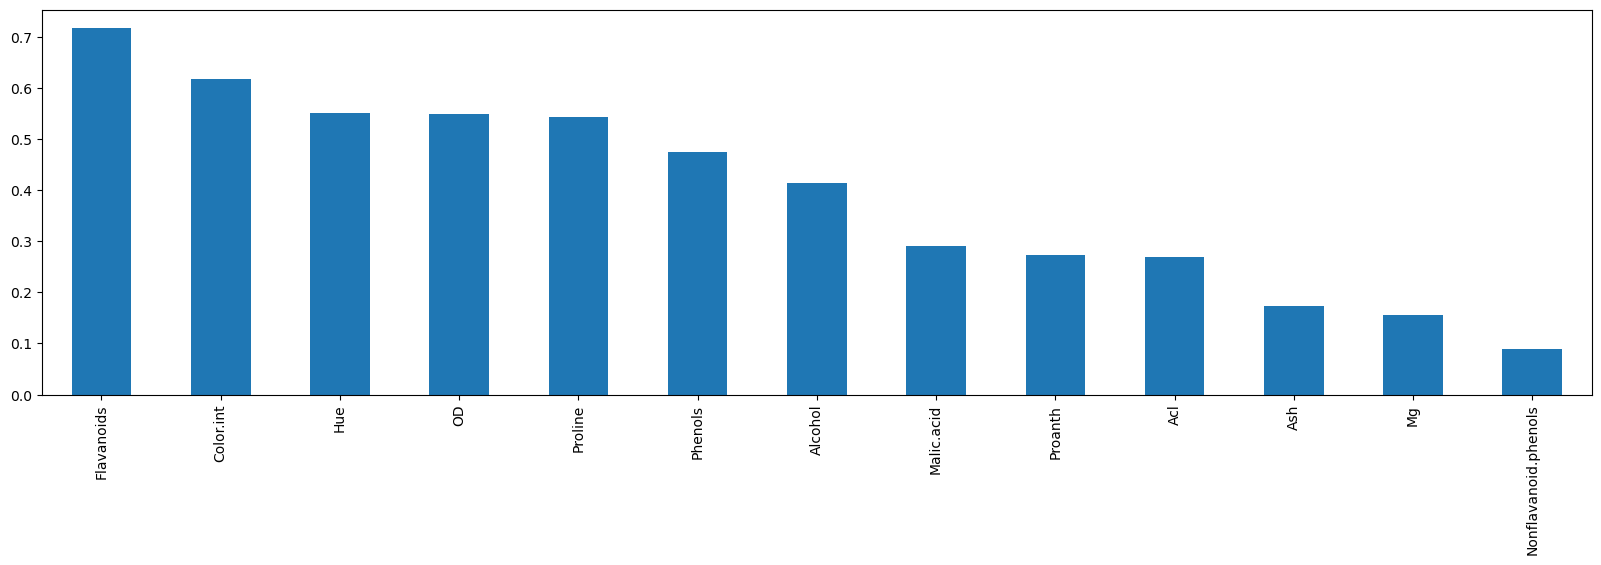

In [118]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,5))

In [121]:
from sklearn.feature_selection import SelectKBest

sel_five_cols=SelectKBest(mutual_info_classif,k=5)
sel_five_cols.fit(X_train,y_train)
sel_five_cols.get_support()

array([False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True])

In [123]:
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

In [124]:
sel_five_cols.scores_

array([0.4207416 , 0.30018973, 0.1893433 , 0.26366616, 0.17097199,
       0.47029654, 0.71476759, 0.09194922, 0.25922625, 0.6289679 ,
       0.53875912, 0.54541341, 0.53438147])

In [126]:
sr=pd.Series(sel_five_cols.scores_,index=X_train.columns)
sr.sort_values(ascending=False)

Flavanoids             0.71
Color.int              0.63
OD                     0.55
Hue                    0.54
Proline                0.53
Phenols                0.47
Alcohol                0.42
Malic.acid             0.30
Acl                    0.26
Proanth                0.26
Ash                    0.19
Mg                     0.17
Nonflavanoid.phenols   0.09
dtype: float64

# As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

In [140]:
housing_df=pd.read_csv(os.getcwd()+"\\Python_practise\\Feature Selection\\"+"housing.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [141]:
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [142]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [143]:
num_list=[i for i in housing_df.columns if housing_df[i].dtype!="O"]
df=housing_df[num_list]
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.00,8450,7,5,2003,2003,196.00,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.00,9600,6,8,1976,1976,0.00,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.00,11250,7,5,2001,2002,162.00,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.00,9550,7,5,1915,1970,0.00,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.00,14260,8,5,2000,2000,350.00,655,...,192,84,0,0,0,0,0,12,2008,250000


In [144]:
# Drop ID
df=df.drop("Id",axis=1)

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop("SalePrice",axis=1),
                                               df["SalePrice"],
                                               test_size=0.3,
                                               random_state=0)

In [146]:
#X_train[X_train.isnull().sum()>0]

{i:X_train[i].isnull().sum() for i in X_train.columns if X_train[i].isnull().sum()>0}

{'LotFrontage': 189, 'MasVnrArea': 5, 'GarageYrBlt': 54}

In [147]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mr=mutual_info_regression(X_train.fillna(0),y_train)
mr

array([2.52980168e-01, 2.10684370e-01, 1.64864343e-01, 5.39027037e-01,
       9.35061682e-02, 3.48511507e-01, 2.46464459e-01, 1.01586636e-01,
       1.62784786e-01, 2.82062693e-04, 1.13541705e-01, 3.86174166e-01,
       3.11326007e-01, 2.24576088e-01, 3.13355903e-03, 4.82187166e-01,
       2.18916970e-02, 4.45085027e-03, 2.70983511e-01, 8.99356293e-02,
       5.18220287e-02, 1.55433437e-02, 1.84880133e-01, 1.85949353e-01,
       2.67394348e-01, 3.88075580e-01, 3.65279503e-01, 8.28497301e-02,
       1.65683814e-01, 1.26609483e-02, 4.13618280e-04, 2.91914303e-02,
       7.42112648e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [149]:
mutual_info = pd.Series(mr)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual     0.54
GrLivArea       0.48
GarageCars      0.39
TotalBsmtSF     0.39
GarageArea      0.37
YearBuilt       0.35
1stFlrSF        0.31
FullBath        0.27
GarageYrBlt     0.27
MSSubClass      0.25
YearRemodAdd    0.25
2ndFlrSF        0.22
LotFrontage     0.21
Fireplaces      0.19
TotRmsAbvGrd    0.18
OpenPorchSF     0.17
LotArea         0.16
BsmtFinSF1      0.16
BsmtUnfSF       0.11
MasVnrArea      0.10
OverallCond     0.09
HalfBath        0.09
WoodDeckSF      0.08
BedroomAbvGr    0.05
ScreenPorch     0.03
BsmtFullBath    0.02
KitchenAbvGr    0.02
EnclosedPorch   0.01
PoolArea        0.01
BsmtHalfBath    0.00
LowQualFinSF    0.00
3SsnPorch       0.00
BsmtFinSF2      0.00
MiscVal         0.00
MoSold          0.00
YrSold          0.00
dtype: float64

mutual_info.sort_values(ascending=False).plot(kind="bar",figsize=(10,6))

## using percentile

In [153]:
from sklearn.feature_selection import SelectPercentile
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000001DDEC83A7A0>)

In [154]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

#### Top 20 percentile means out of all these features if "YearBuilt" is in my top 20 percentile feature it says how many num of feature are having less dependency when comapared to this, means 20% of our feature are having less num of dependency w.r.t this feature

# Embedded Meathod

#### Lasso

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/mobile_dataset.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
X=df.iloc[:,:-1]
y=df["price_range"]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.2)

In [10]:
from sklearn.linear_model import Lasso
 
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [12]:
y_pred=lasso.predict(X_test)
mse=np.mean((y_test-y_pred)**2)
mse

0.10163836289769605

In [13]:
lasso.coef_

array([ 0.00051258,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.00021221,  0.        ,
       -0.        ,  0.00028265,  0.00026645,  0.00094756,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ])

In [17]:
ds=pd.Series(abs(lasso.coef_) ,index=X_train.columns)
ds.sort_values(ascending=False)

ram              0.000948
battery_power    0.000513
px_height        0.000283
px_width         0.000266
mobile_wt        0.000212
touch_screen     0.000000
three_g          0.000000
talk_time        0.000000
sc_w             0.000000
sc_h             0.000000
pc               0.000000
blue             0.000000
n_cores          0.000000
m_dep            0.000000
int_memory       0.000000
four_g           0.000000
fc               0.000000
dual_sim         0.000000
clock_speed      0.000000
wifi             0.000000
dtype: float64

#### The columns whose values is zero can be removed, high feature value means its usage is also high.

## Using Random Forest to Select features¶

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100,random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
important=rf.feature_importances_
important

array([5.15323056e-02, 1.97100341e-04, 1.84854291e-03, 3.46710215e-04,
       1.40882663e-03, 3.04626052e-04, 2.41349789e-03, 1.50797502e-03,
       4.52503251e-03, 1.43763522e-03, 2.18301327e-03, 3.12560973e-02,
       2.63751835e-02, 8.67569525e-01, 1.95316823e-03, 1.90424569e-03,
       2.35842521e-03, 3.95851418e-04, 2.36779533e-04, 2.45458710e-04])

<Axes: >

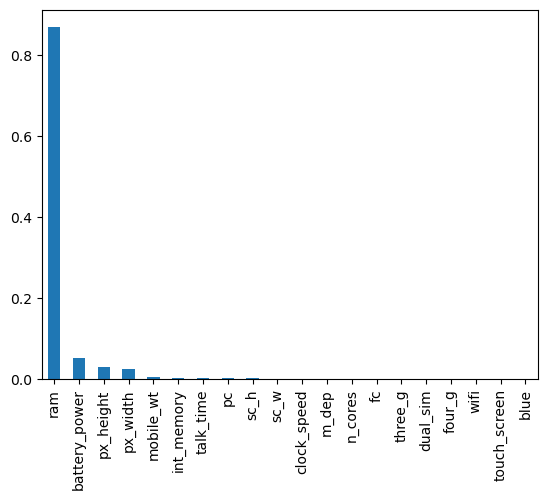

In [22]:
forest_importances = pd.Series(important, index=X_train.columns)
forest_importances.sort_values(ascending=False).plot(kind="bar")